In [3]:
import statistics
# %pip install numpy
# %pip install seaborn
import numpy as np
import seaborn as sns

Text(0.5, 1.0, 'Sample Plot')

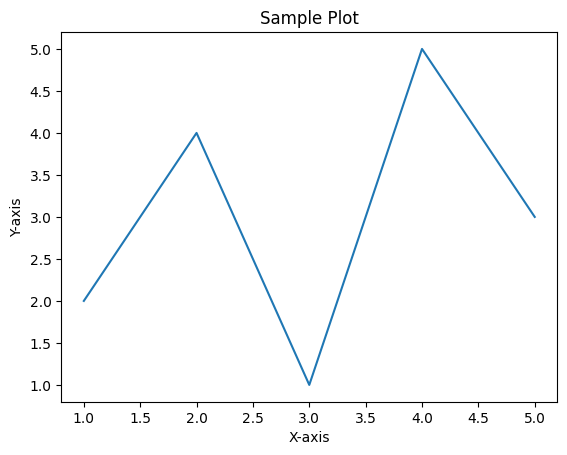

In [4]:
import matplotlib.pyplot as plt

# The magic command - Must be on its own line
%matplotlib inline 

# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create a simple plot
plt.plot(x, y)

# Add labels and title (optional, but good practice)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sample Plot")

# Display the plot -  Not strictly needed with %matplotlib inline
# plt.show()

In [5]:


df=sns.load_dataset('tips')

In [6]:
df.head()
df.describe()
statistics.mode(df['total_bill'])

13.42

<Axes: xlabel='day', ylabel='total_bill'>

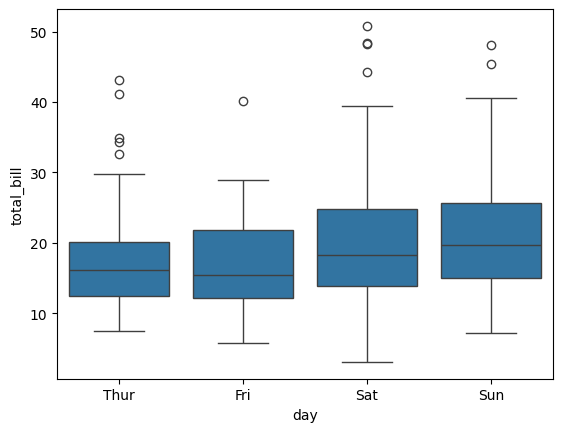

In [7]:
sns.boxplot(x='day', y='total_bill', data=df)

<Axes: xlabel='total_bill'>

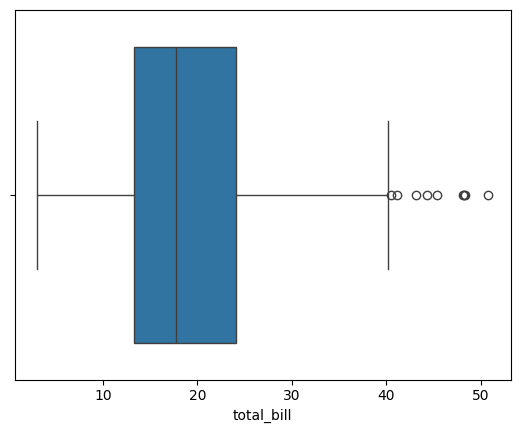

In [ ]:
sns.boxplot(df['total_bill'] ,orient='h')

<Axes: xlabel='total_bill', ylabel='Count'>

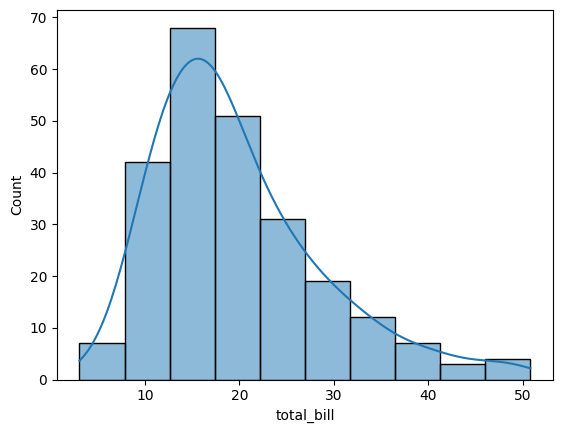

In [ ]:
sns.histplot(df['total_bill'], bins=10, kde=True)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

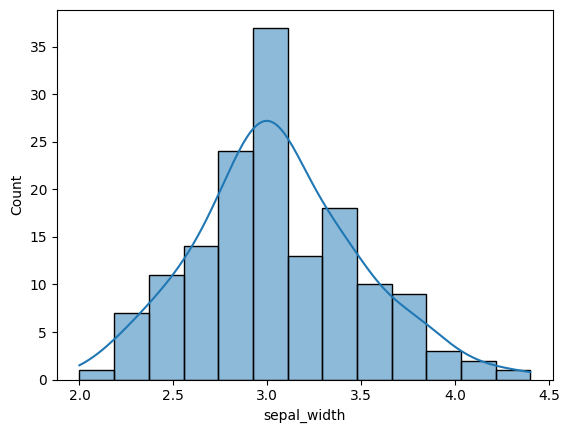

In [ ]:
df2=sns.load_dataset('iris')
print(df2.head())
sns.histplot(df2['sepal_width'], kde=True)


<Axes: xlabel='petal_length', ylabel='Count'>

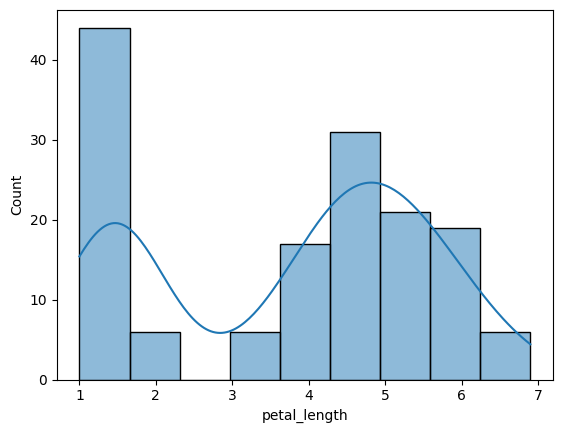

In [ ]:
sns.histplot(df2['petal_length'], kde=True)

In [ ]:
###  Outliers

In [ ]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
list_length = len(dataset)
print(list_length)  # Output: 5

34


In [ ]:
outliers = []
def detect_outlier(data_1):
    
    threshold=3 ## 3 standard deviation
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers 

outlier_datapoints = detect_outlier(dataset)
print(outliers)

[102, 107, 108]


(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

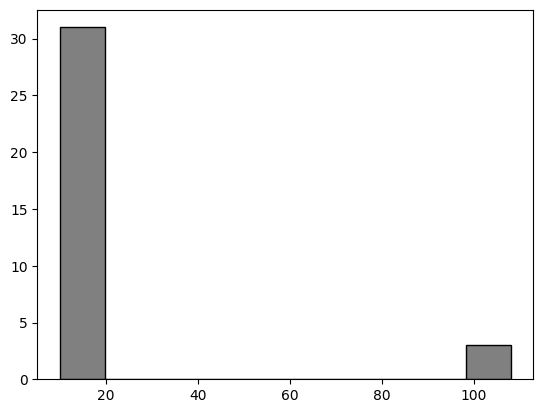

In [ ]:

plt.hist(dataset, bins=10, color='grey', edgecolor='black')

In [ ]:
#IQR
dataset.sort()
print(dataset)
q1, q3= np.percentile(dataset,[25,75])
print(q1,q3)
iqr = q3 - q1
print(iqr)
lower_bound = q1 -(1.5 * iqr)
upper_bound = q3 +(1.5 * iqr)
print(lower_bound,upper_bound)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19, 102, 107, 108]
12.0 15.0
3.0
7.5 19.5


<Axes: >

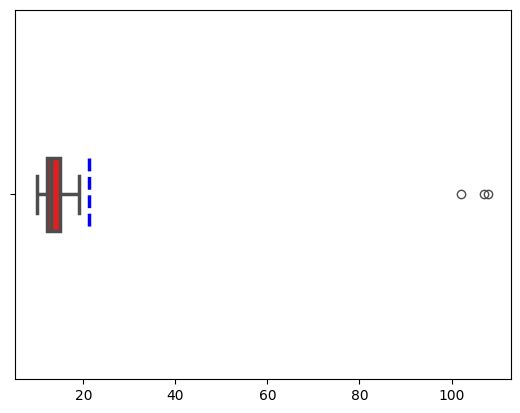

In [ ]:
sns.boxplot(dataset,orient='h',color='red',width=0.2,linewidth=2.5,whis=1.5,showmeans=True,meanline=True,meanprops={'color':'blue','linewidth':2.5})

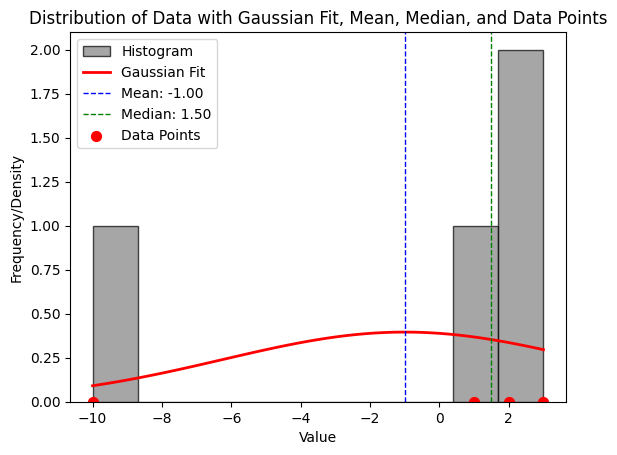

Mean: -1.00
Median: 1.50


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

lst = [-10, 1, 2, 3]

# Calculate mean and median
mean = np.mean(lst)
median = np.median(lst)

# Plot the histogram
plt.hist(lst, bins=10, color='grey', edgecolor='black', alpha=0.7, label='Histogram')

# Fit a Gaussian distribution
mu, sigma = stats.norm.fit(lst)
x = np.linspace(min(lst), max(lst), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, pdf * len(lst) * (max(x) - min(x)) / 10, 'r-', linewidth=2, label='Gaussian Fit')

# Plot mean and median lines
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')

# Plot the data points (scatter plot)
plt.scatter(lst, np.zeros_like(lst), color='r', marker='o', s=100, label='Data Points') #s controls size of the points


plt.title('Distribution of Data with Gaussian Fit, Mean, Median, and Data Points')
plt.xlabel('Value')
plt.ylabel('Frequency/Density') #y-axis label updated to show it represents frequency and density
plt.legend()
plt.show()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")

In this specific dataset [-10, 1, 2, 3], the mean (-1.00) is significantly lower than the median (1.50). This suggests that the data is skewed to the left (negatively skewed). The outlier (-10) pulls the mean towards the lower values, while the median remains less affected by extreme values.

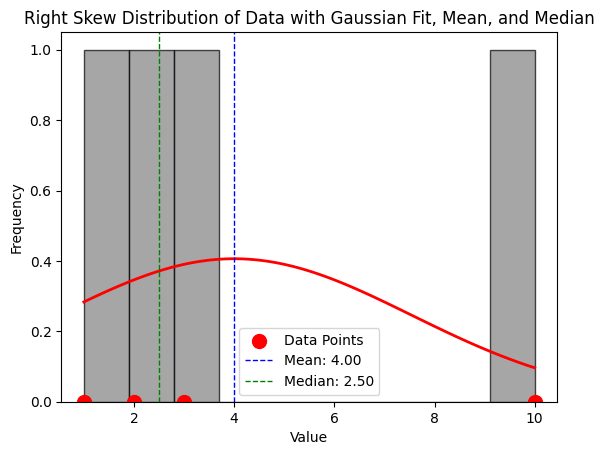

Mean: 4.00
Median: 2.50


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

lst = [1, 2, 3, 10.]

# Calculate mean and median
mean = np.mean(lst)
median = np.median(lst)

# Plot the histogram
plt.hist(lst, bins=10, color='grey', edgecolor='black', alpha=0.7)

# Fit a Gaussian distribution
mu, sigma = stats.norm.fit(lst)
x = np.linspace(min(lst), max(lst), 100)
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the Gaussian curve
plt.plot(x, pdf * len(lst) * (max(x) - min(x)) / 10, 'r-', linewidth=2)
# Plot the data points (scatter plot)
plt.scatter(lst, np.zeros_like(lst), color='r', marker='o', s=100, label='Data Points') #s controls size of the points
# Plot mean and median lines
plt.axvline(mean, color='b', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')

plt.title('Right Skew Distribution of Data with Gaussian Fit, Mean, and Median')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")

In [1]:
import pandas as pd
# %pip install scipy
from scipy import stats

# Sample data (replace with your actual 'Item_Outlet_Sales' data)
data = {'Item_Outlet_Sales': [2500, 2300, 2800, 2100, 2650, 3000, 2200, 2400]}
df = pd.DataFrame(data)
sales_data = df['Item_Outlet_Sales']

claimed_mean = 2280
alpha = 0.05  # Significance level for 95% confidence

# Perform a one-sample t-test (right-tailed)
t_statistic, p_value = stats.ttest_1samp(sales_data, claimed_mean, alternative='greater')

print(f"T-statistic: {t_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is sufficient evidence to suggest that the average item outlet sales is greater than $2280.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not sufficient evidence to suggest that the average item outlet sales is greater than $2280.")

# Calculate the 95% confidence interval for the sample mean
sample_mean = sales_data.mean()
sample_std = sales_data.std()
n = len(sales_data)
standard_error = sample_std / (n**0.5)
confidence_interval = stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=standard_error)
print(f"95% Confidence Interval for the sample mean: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

# Check if the claimed mean falls within the confidence interval (one-sided check for the claim)
lower_bound_95 = sample_mean - stats.t.ppf(0.95, df=n-1) * standard_error
print(f"One-sided 95% Confidence Lower Bound: {lower_bound_95:.2f}")

if claimed_mean > lower_bound_95:
    print("The claimed average of $2280 is within the plausible range based on our sample.")
else:
    print("The claimed average of $2280 is below the plausible range based on our sample.")

T-statistic: 1.966
P-value: 0.045
Reject the null hypothesis.
There is sufficient evidence to suggest that the average item outlet sales is greater than $2280.
95% Confidence Interval for the sample mean: (2236.62, 2750.88)
One-sided 95% Confidence Lower Bound: 2287.73
The claimed average of $2280 is below the plausible range based on our sample.


In [2]:
import numpy as np
from scipy import stats

sample_mean = 3.5
population_mean_hypothesized = 3
sample_std = 0.75
sample_size = 50
alpha = 0.01  # Significance level

# Calculate the t-statistic
t_statistic = (sample_mean - population_mean_hypothesized) / (sample_std / np.sqrt(sample_size))
print(f"Calculated t-statistic: {t_statistic:.4f}")

# Calculate the p-value for a right-tailed t-test
degrees_of_freedom = sample_size - 1
p_value = 1 - stats.t.cdf(t_statistic, df=degrees_of_freedom)
print(f"Calculated p-value: {p_value:.4f}")

Calculated t-statistic: 4.7140
Calculated p-value: 0.0000


In [3]:
if p_value < alpha:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is sufficient statistical evidence at the 99% confidence level to support the fisherman's claim that the average weight of fishes in the pond is greater than 3 kg.")
else:
    print("\nInterpretation:")
    print(f"Since the p-value ({p_value:.4f}) is greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is not sufficient statistical evidence at the 99% confidence level to support the fisherman's claim that the average weight of fishes in the pond is greater than 3 kg.")


Interpretation:
Since the p-value (0.0000) is less than the significance level (0.01), we reject the null hypothesis.
There is sufficient statistical evidence at the 99% confidence level to support the fisherman's claim that the average weight of fishes in the pond is greater than 3 kg.


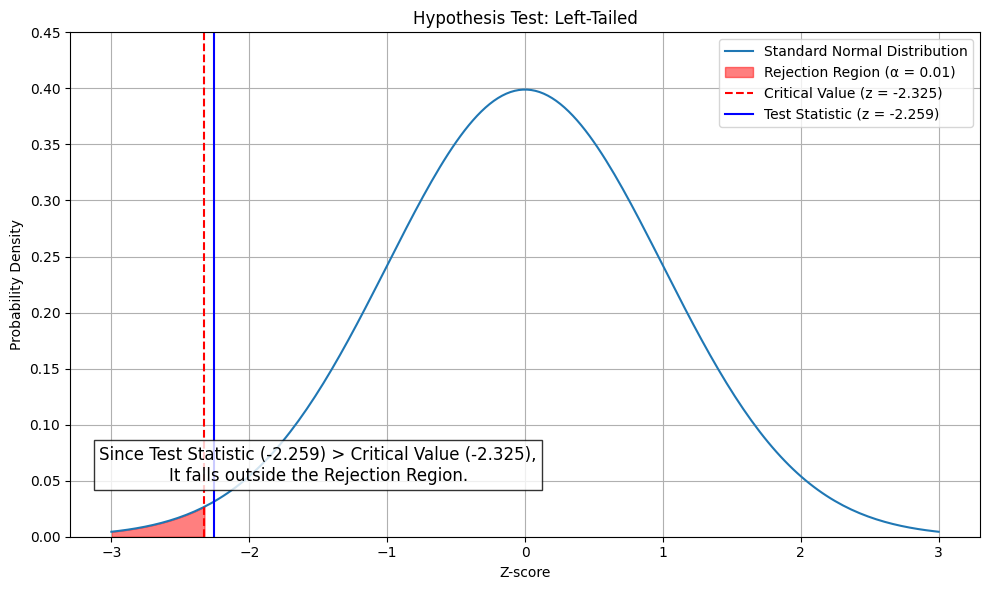

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters
mean = 0  # Mean of the standard normal distribution
std_dev = 1  # Standard deviation of the standard normal distribution
alpha = 0.01  # Significance level
critical_value = -2.325
test_statistic = -2.259

# Generate x-values for the plot
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 200)
y = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection region (left tail)
x_reject = np.linspace(mean - 3 * std_dev, critical_value, 100)
y_reject = norm.pdf(x_reject, mean, std_dev)
plt.fill_between(x_reject, 0, y_reject, color='red', alpha=0.5, label='Rejection Region (α = 0.01)')

# Plot the critical value line
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value (z = {critical_value:.3f})')

# Plot the test statistic line
plt.axvline(test_statistic, color='blue', linestyle='-', label=f'Test Statistic (z = {test_statistic:.3f})')

# Add labels and title
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Hypothesis Test: Left-Tailed')
plt.legend()
plt.grid(True)

# Add text to explain the outcome
plt.text(-1.5, 0.05, f'Since Test Statistic ({test_statistic:.3f}) > Critical Value ({critical_value:.3f}),\nIt falls outside the Rejection Region.', ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Show the plot
plt.ylim(0, 0.45)
plt.tight_layout()
plt.show()

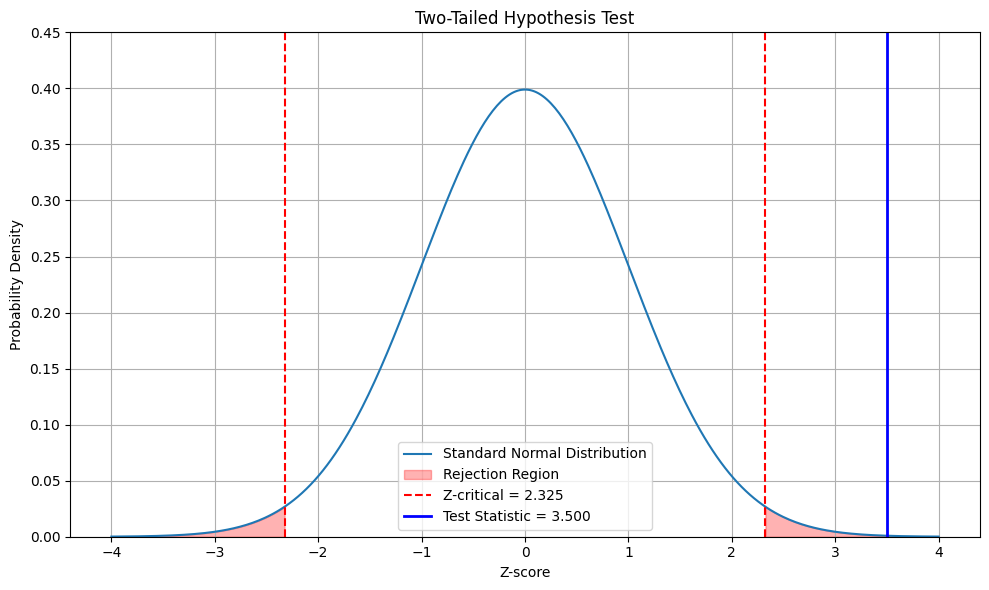

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the standard normal distribution
mean = 0
std_dev = 1

# Define the critical values
z_critical_right = 2.325
z_critical_left = -2.325

# Define the test statistic (from your example)
test_statistic = 3.5

# Generate x-values for the plot
x = np.linspace(mean - 4, mean + 4, 400)
y = norm.pdf(x, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Standard Normal Distribution')

# Shade the rejection regions (tails)
x_right_reject = np.linspace(z_critical_right, mean + 4, 100)
y_right_reject = norm.pdf(x_right_reject, mean, std_dev)
plt.fill_between(x_right_reject, 0, y_right_reject, color='red', alpha=0.3, label='Rejection Region')

x_left_reject = np.linspace(mean - 4, z_critical_left, 100)
y_left_reject = norm.pdf(x_left_reject, mean, std_dev)
plt.fill_between(x_left_reject, 0, y_left_reject, color='red', alpha=0.3)

# Plot the critical value lines (the fences)
plt.axvline(z_critical_right, color='red', linestyle='--', label=f'Z-critical = {z_critical_right:.3f}')
plt.axvline(z_critical_left, color='red', linestyle='--')

# Plot the test statistic
plt.axvline(test_statistic, color='blue', linestyle='-', linewidth=2, label=f'Test Statistic = {test_statistic:.3f}')

# Add labels and title
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.title('Two-Tailed Hypothesis Test')
plt.legend()
plt.grid(True)
plt.ylim(0, 0.45)
plt.tight_layout()
plt.show()

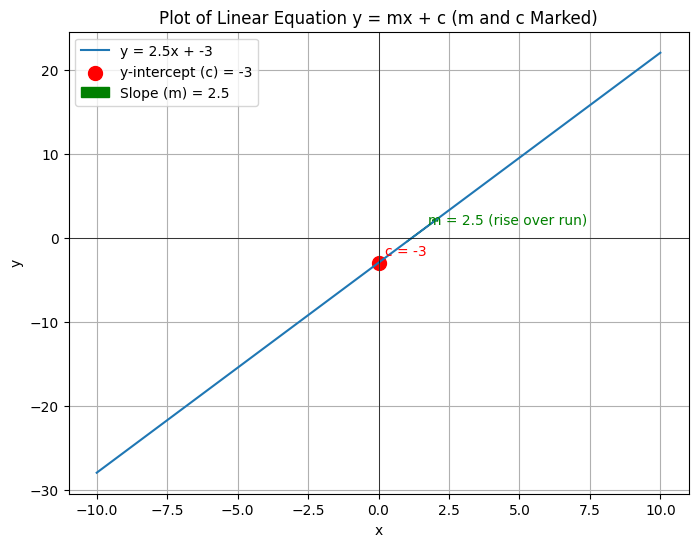

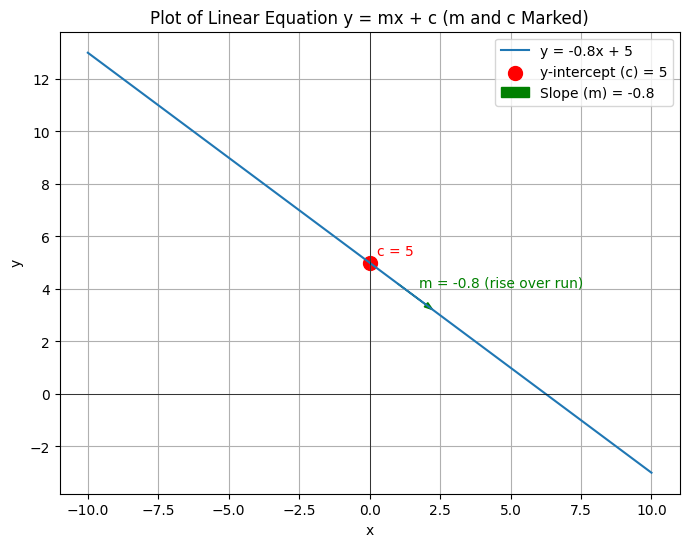

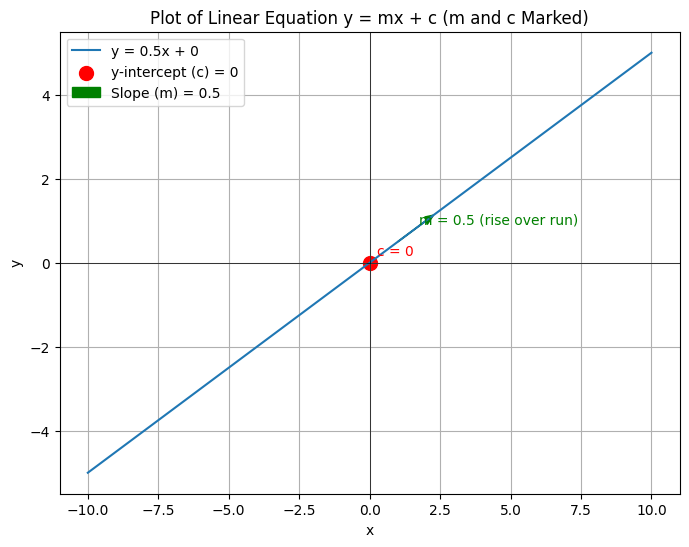

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_linear_equation_marked(m, c):
    """
    Plots the linear equation y = mx + c and marks m and c.

    Args:
        m (float): The slope of the line.
        c (float): The y-intercept of the line.
    """

    # Generate some x values to plot the line
    x = np.linspace(-10, 10, 100)
    y = m * x + c

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'y = {m}x + {c}')

    # Mark the y-intercept (c)
    plt.scatter(0, c, color='red', marker='o', s=100, label=f'y-intercept (c) = {c}')
    plt.annotate(f'c = {c}', (0, c), textcoords="offset points", xytext=(5, 5), ha='left', color='red')

    # Mark the slope (m) - visually demonstrate rise over run
    x_slope_start = 1  # Choose an x-value to start the "run"
    y_slope_start = m * x_slope_start + c
    x_slope_end = x_slope_start + 1  # Run of 1
    y_slope_end = m * x_slope_end + c  # Rise of m

    plt.arrow(x_slope_start, y_slope_start, 1, m, head_width=0.2, head_length=0.3, fc='green', ec='green', label=f'Slope (m) = {m}')
    plt.annotate(f'm = {m} (rise over run)', ((x_slope_start + x_slope_end) / 2, (y_slope_start + y_slope_end) / 2),
                 textcoords="offset points", xytext=(5, 5), ha='left', color='green')

    # Add labels and title
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of Linear Equation y = mx + c (m and c Marked)')

    # Add a legend
    plt.legend()

    # Add grid lines
    plt.grid(True)

    # Draw the axes
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Show the plot
    plt.show()

# Example usage:
slope = 2.5
intercept = -3
plot_linear_equation_marked(slope, intercept)

slope = -0.8
intercept = 5
plot_linear_equation_marked(slope, intercept)

slope = 0.5
intercept = 0
plot_linear_equation_marked(slope, intercept)

PMF: Probability of a specific outcome for discrete variables.

PDF: Likelihood of an outcome within a range for continuous variables (area under the curve gives probability).

CDF: Probability of an outcome being less than or equal to a specific value (for both discrete and continuous).